In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [3]:
FILENAME = 'NiCatalysis.csv'

In [4]:
df = pd.read_csv(FILENAME)

In [5]:
df['type'] = [str(i)[:4] for i in df['Name']]
print(Counter(df['type']))

Counter({'Carb': 770, 'Phos': 653})


In [14]:
median = df['\\DeltaG4'].median()
print(median)

-12.718989446635709


In [7]:
df['deltaG4_bin'] = pd.qcut(df['\\DeltaG4'], 2, labels=[0,1])
print(len(df))

1423


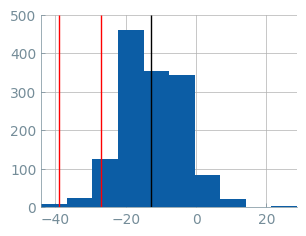

In [16]:
df['\\DeltaG4'].hist()
plt.vlines(-27, 0, 500, colors = 'red')
plt.vlines(-39, 0, 500, colors = 'red')

plt.vlines(median, 0, 500, colors = 'k')



In [9]:
LOWER = -39
UPPER = -27

real_bin = []
for i in df['\\DeltaG4']:
    if LOWER < i  < UPPER:
        real_bin.append(1)
    else:
        real_bin.append(0)

df[f'deltaG4_realbin{UPPER}_{LOWER}'] = real_bin

Text(0.5, 0, 'Optimal\n-27 < E < -39')

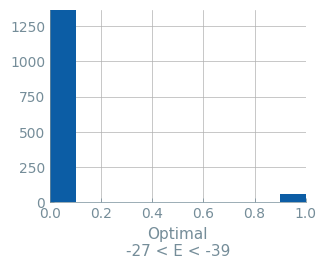

In [10]:
df['deltaG4_realbin-27_-39'].hist()
plt.xlabel('Optimal\n-27 < E < -39')

In [11]:
df['deltaG4_realbin-27_-39'].value_counts(normalize=True)

deltaG4_realbin-27_-39
0    0.961349
1    0.038651
Name: proportion, dtype: float64

In [12]:
df.to_csv(FILENAME)